In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

ff1.plotting.setup_mpl(misc_mpl_mods=False)

In [3]:
# get session
session = ff1.get_session(2024, 5, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) C:\Users\fedor\AppData\Local\Temp\fastf1
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.3.5]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track

In [64]:
# example on what will be used to get the laps we want
# we're not trying to include the 2 safety car laps (these will skew data)
session.laps.pick_driver('ALB').pick_quicklaps(1.18)['LapTime'].dt.total_seconds()

476    103.157
477    103.014
478    102.975
479    103.392
480    103.353
481    103.361
482    103.991
483    108.371
485    102.937
486    102.151
487    102.608
488    103.274
489    102.762
490    102.611
491    103.118
492    103.004
493    103.187
494    103.186
499    111.954
501    116.850
506    102.221
507    101.269
508    100.790
509    101.335
510    101.380
511    101.261
512    101.088
513    101.341
514    101.672
515    101.755
516    101.558
517    101.423
518    101.504
519    101.660
520    101.776
521    101.584
522    101.509
523    101.404
524    101.438
525    101.437
526    101.670
527    101.354
528    102.424
529    101.998
530    101.524
Name: LapTime, dtype: float64

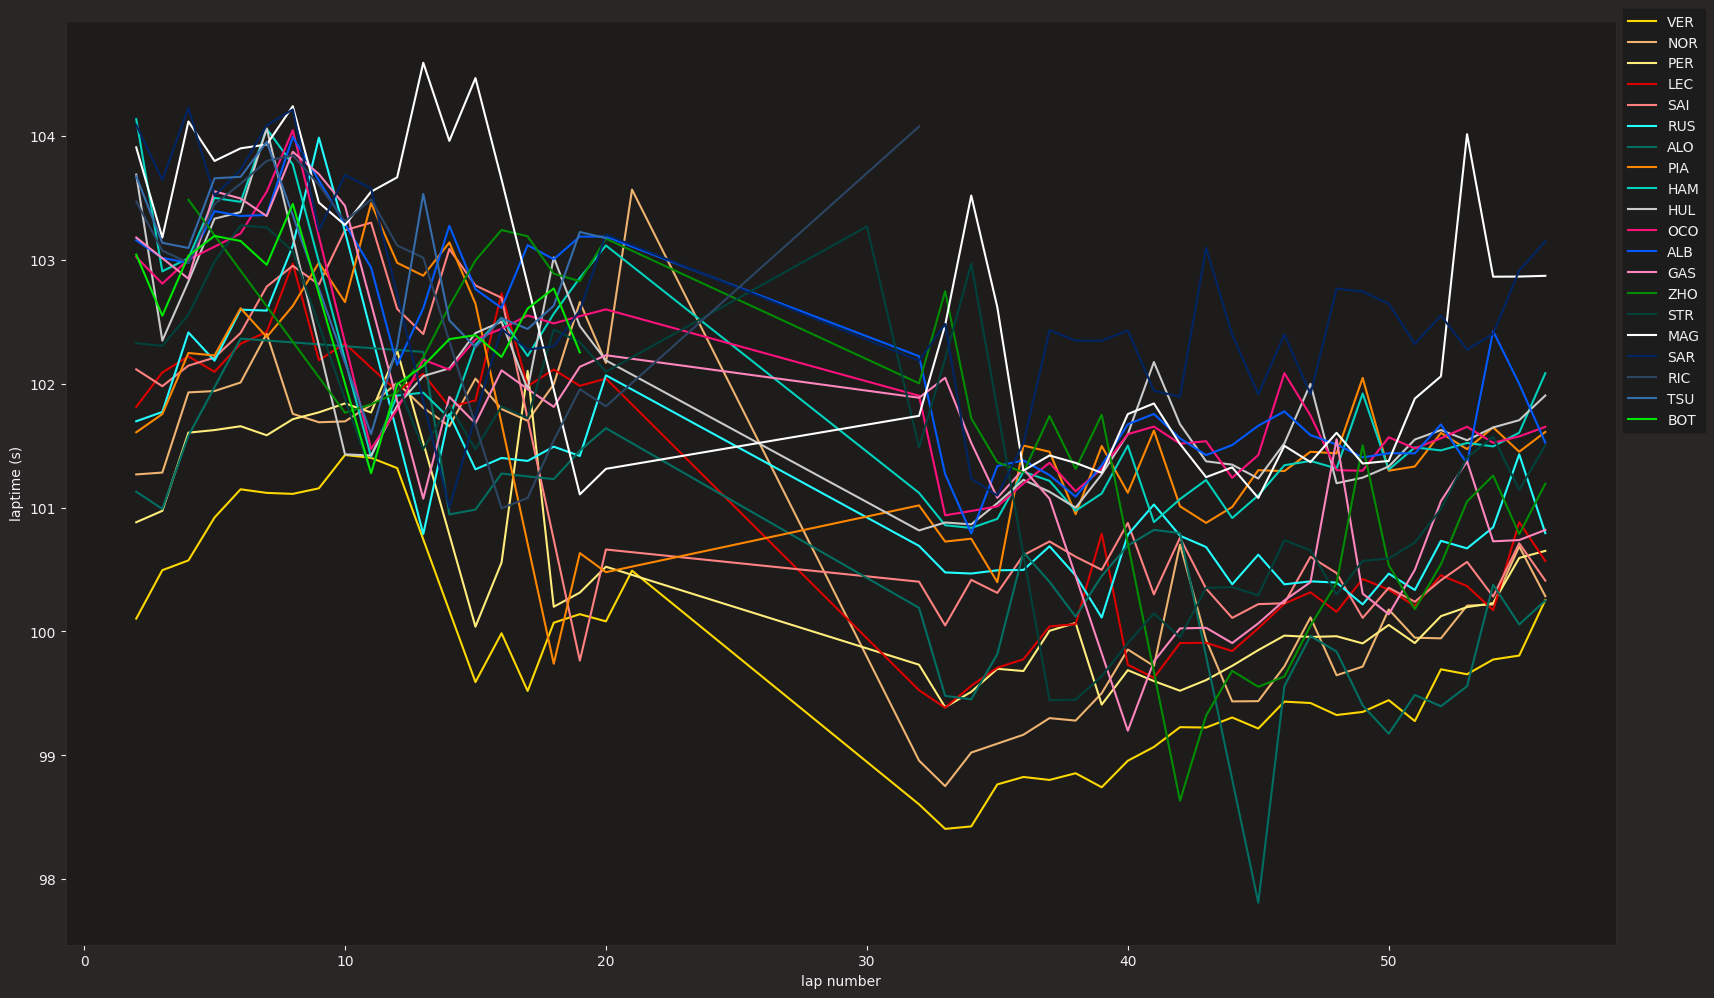

In [72]:
# trying to list laptimes (y) over laps (x)
fig, ax = plt.subplots(figsize=(20, 12))

for driver in session.drivers:
    drv_laps = session.laps.pick_driver(driver).pick_quicklaps(1.05)
    abb = drv_laps['Driver'].iloc[0]
    color = ff1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['LapTime'].dt.total_seconds(), label=abb, color=color)

ax.set_ylabel('laptime (s)')
ax.set_xlabel('lap number')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.show()